In [1]:
#libraries that we will need
import numpy as np
import pandas as pd
import seaborn as sns

import wget

In [2]:
# data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
# wget.download(data)

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Data Preparation

In [4]:
#lowercase the column titles and put and underscore instead of spaces
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
#lowercase the object values  and put and underscore instead of spaces
string_col = df.columns[df.dtypes == 'object'] #extracting the object/string columns in a list

for col in string_col:
    df[col] = df[col].str.lower().str.replace(' ', '_') # perfommin

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploratory data analysis

- 'msrp' is what we will predict

In [6]:
#return a column, it's first 5 unique values and total unique values
for col in df.columns:
    print(col)
    print(df[col].unique()[:5]) #first 5 unique values in a column
    print(df[col].nunique()) #number of unique values
    print()
    print('--------------------------------------------------------------------------------------')
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

--------------------------------------------------------------------------------------

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

--------------------------------------------------------------------------------------

year
[2011 2012 2013 1992 1993]
28

--------------------------------------------------------------------------------------

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

--------------------------------------------------------------------------------------

engine_hp
[335. 300. 230. 320. 172.]
356

--------------------------------------------------------------------------------------

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

--------------------------------------------------------------------------------------

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']

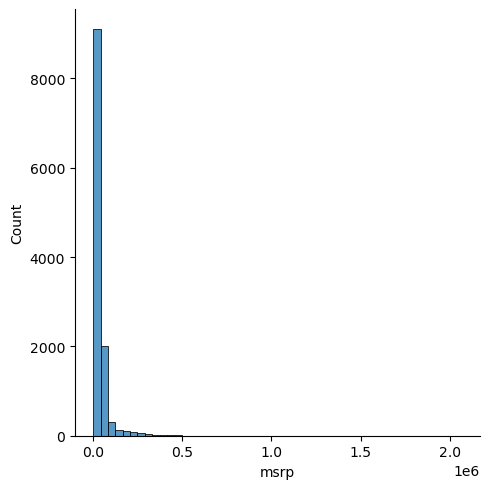

In [7]:
#plot histogram of msrp
sns.displot(df['msrp'], bins=50);

This is plot is what is called a long tai, let's we try to zoom in for better visuals

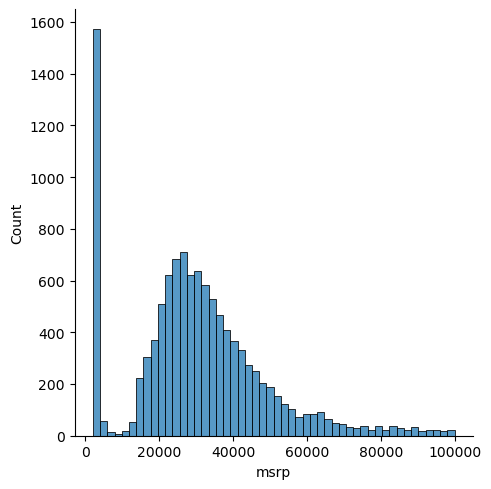

In [8]:
#try to zoom in for prices less than 100.000 and plot it's histogram
sns.displot(df['msrp'][df['msrp'] < 100000], bins=50);

DO NOT confuse this plot, it is not a normal ditribution it is still a long tail we just zoomed it in 

So with a ditribution like this we need to normalise it so that the model will learn better by using a log transformation

log+1 is a standard application so incase there's a 0 value it would not return an error

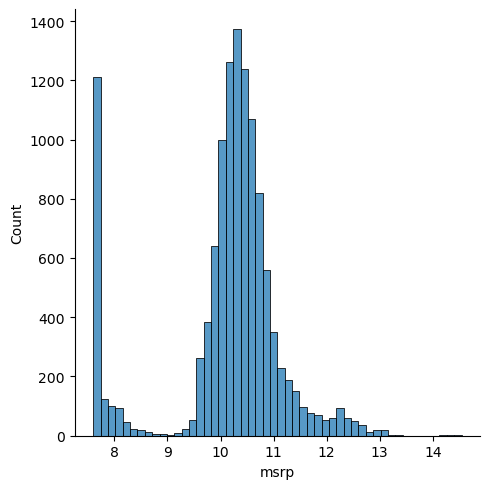

In [9]:
#transform the data 
log_price = np.log1p(df['msrp'])

sns.displot(log_price, bins=50);

In [10]:
#check for missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [11]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Working on Validation framework

In [12]:
n = len(df)

n_val = int(n*0.2) #20% split for validation
n_test = int(n*0.2) #20% split for test
n_train = n - n_val - n_test #60% split for the training data

n, n_val+n_train+n_test

(11914, 11914)

- Next thing to do is to put the np.random.seed(2) for reproducibility
- shuffle the data so that it won't be sequencial as the df dataframe  if so for example the validation data will not have bmw model 


In [13]:
#this is for me to remember the what the function does
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [14]:
np.random.seed(2)
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [15]:
#shuffling the index
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [16]:
#splitting using the index idx variable for train, test, and validation
df_train = df.iloc[idx[:n_train]]
df_test = df.iloc[idx[n_train:n_train+n_test]]
df_val = df.iloc[idx[n_train+n_test:]]


In [17]:
#reseting the indeces for each split dataframe
df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)
df_val.reset_index(inplace=True)


In [18]:
#apply the log+1 transformation to y equavalent frame
y_train = np.log1p(df_train['msrp']).values
y_test = np.log1p(df_test['msrp']).values
y_val= np.log1p(df_val['msrp']).values

In [19]:
#delting the target/variable that will be predicted msrp to avoid using it 
del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

# Linear Regression

How to implement linear regression 

# <div style="text-align: center;">$pred = w_0 + \sum_{j=1}^n w_j x_ij $</div>






In [20]:
w0 = 7.17 # this is the bias term/ and intercept

#   [w1,   w2,    w3]
w = [0.01, 0.04, 0.002]



#defining the linear regression formular
def linear_regression(xi):
    pred = w0
    n = len(w)
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred


In [21]:
xi = [453, 11, 86]
linear_regression(xi)

12.312

In [22]:
#the answer is still in log+1 formatt let's revert it with exponent-1
np.expm1(linear_regression(xi))

222347.2221101062

# Linear Regression in vector form

First we need to code the dot product of a vector to reduce the code for linear regression

In [23]:
#dot product function
def dot(xi, w):
    n = len(xi)
    result = 0
    
    for j in range(n):
        result = result + xi[j] * w[j]
    return result

In [24]:
#reduced formula for linear regression
def linear_regression(xi):
    return w0 + dot(xi, w)

In [25]:
linear_regression(xi)

12.312000000000001

If we take a notice in to the formuala:
# <div style="text-align: center;">$pred = w_0 + \sum_{j=1}^n w_j x_ij $</div>
$w_0$ has an invisible $x_0$ = 1 in a sense that we can combine both the weights w = [w1, w2, w3] into w = [w0 ,w1, w2, w3] and x = [x1, x2, x3] into x = [x0, x1, x2, x3] to simplify the formular into

# <div style="text-align: center;">$g(x_i) = X_{i}^T W$</div>

the code is written as follow:

In [26]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w = [w0] + w # adding the bias weight as first term
def linear_regression(xi):
    xi = [1] + xi # we are adding 1 since bias term/ intercept has x0 = 1
    return X.dot(w) 

Each column of this matrix is a feature:
1. The first column is a dummy feature with “1”
2. The second column is the engine horsepower
3. The third — MPG in the city
4. And the last one — popularity, or the number of mentions in a Twitter stream 

In [27]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86] 

In [28]:
X = [x1, x2, x10] # combine these rows into a list to make a matrix 
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

When you comeback to the code might confuse you, do not fret since the's like 4 columns in $X$ array you tjink that when you put it in the linear_regression() function it will return 4 lenght array but remember that it sums up the rows with their weights that's why the answer return a 3 array

In [29]:
#calculate the prediction
linear_regression(X)

array([12.38 , 13.552, 12.312])

# Training linear Regression: Normal equation

The formular of getting weights from for the features and intercept/bias term is:
# <div style="text-align: center;">$w = (X^{T} X)^{-1}X^{T}y$</div>

In [30]:
def train_linear_regression(X, y):
    '''
    args:
          X - m*n matrix
          y - m*1 matrix
          
    return:
            weights
    '''
    ones = np.ones(X.shape[0]) #generate the ones to add in a matrix
    X = np.column_stack([ones, X]) #adding the ones in X matrix
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:] # returning the intercept/bias wieght and the feature weight(s)
    
    
    

In [31]:
X = [[148,24,1385],
    [132,25,2031],
    [453,11,86],
    [158,24,185],
    [172,25,201],
    [413,11,86],
    [38,54,185],
    [142,25,431],
    [453,31,86]]

X = np.array(X)

X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [32]:
y = [100,200,150,250,100,200,150,250,120]

In [33]:
train_linear_regression(X,y)

(300.06776692555593, array([-0.22774253, -2.5769413 , -0.02301206]))

# Baseline Model for Car Price Prediction Project

In [34]:
df_train.columns

Index(['index', 'make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [35]:
#extracting the features we will use to predict the price of the car from the dataframe
base = ['engine_hp', 'engine_cylinders','highway_mpg', 'city_mpg', 'popularity' ]

df_train[base].head()

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657


In [36]:
#extracting only values and convert them into a numpy array
X_train = df_train[base].values

filling the null values with zero in a sense that eg $W_1 x_1$ if $x_1 = 0 $(the fillna value) the then it would be ignored 
since it will sum up to zero


In [37]:
X_train = df_train[base].fillna(0)

In [38]:
#train the model and extract the wights
w_0, w = train_linear_regression(X_train, y_train)
w_0, w

(7.927257388070117,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [39]:
#prediction
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

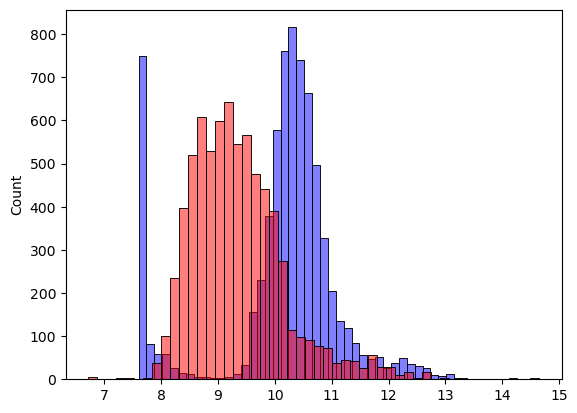

In [40]:
#plot and compare both the prediction and actual values
sns.histplot(y_train, alpha=0.5, color='Blue', bins=50)
sns.histplot(y_pred, alpha=0.5, color='red', bins=50)

# Root mean square error

# \begin{equation}
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
\end{equation}

In [41]:
def rmse(y, y_pred):
    error = y_pred - y # A
    mse = (error ** 2).mean() # B
    return np.sqrt(mse)

In [42]:
rmse(y_train, y_pred)

1.069624705566425

# Computing the RMSE for Validation model
We want to compute the RSME of the validation set

In [43]:
base = ['engine_hp', 'engine_cylinders','highway_mpg', 'city_mpg', 'popularity' ]

In [44]:
#Automate the process of preparing the data {train, val, and test}
def prepare_X(df):
    df_nums = df[base]
    df_nums = df_nums.fillna(0)
    X = df_nums.values
    return X

In [45]:
#extract the train set
X_train = prepare_X(df_train)
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [46]:
#apply the extracted X_train to get the weights
w0, w = train_linear_regression(X_train, y_train)
w0, w

(7.927257388070117,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [47]:
#extract the Validation set
X_val = prepare_X(df_val)

In [48]:
#use the extracted weights and apply them to the validation set X_val to make predictions
y_pred_val = w0 + X_val.dot(w)

In [49]:
#computing the predicted y validation and exact y validation using the RMSE
rmse(y_pred_val, y_val)

0.7359130757318728

# Feature Engineering

For the purpose of the project we're suppose the age of the car counts so instead of using a year model we'll look at the data when it was created

In [50]:
#the year the data was collected
df['year'].max()

2017

In [51]:
# creating the new feature of age of the car
2017 - df_train['year']

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [52]:
#adding the feature for automation in our prepaire data

def prepare_X(df):
    df = df.copy() #if we don't include this part it will append whatever we're doing to the original data
    
    df['age'] = 2017 - df['year']
    features = base + ['age'] # adding the base to the age
    
    df_nums = df[features]
    df_nums = df_nums.fillna(0)
    X = df_nums.values
    return X

In [53]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)

In [54]:
rmse(y_pred_val, y_val)

0.5149229218585324

now the rmse = 0.51... which dropped from 0.73.. which is good since we're looking to reduce it 

<Axes: ylabel='Count'>

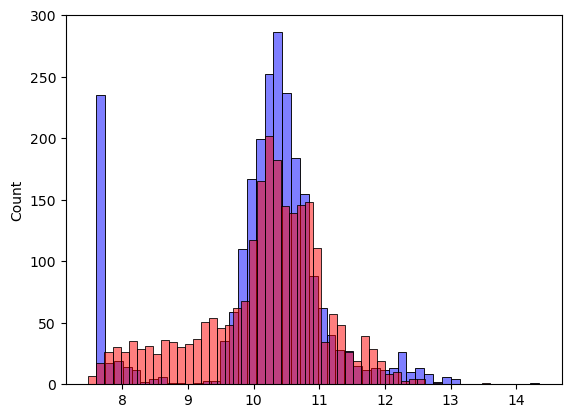

In [55]:
#we can visualise the validation and prediction
sns.histplot(y_val, alpha=0.5, color='Blue', bins=50)
sns.histplot(y_pred_val, alpha=0.5, color='red', bins=50)


Now we can that the graph has impoved 

# Categorical  Variables

In [56]:
categorical_columns = ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
                      'market_category', 'vehicle_size', 'vehicle_style'
                      ]

In [57]:
categories = {}

for c in categorical_columns:
    categories[c] = list(df[c].value_counts().head().index)
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [58]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()  # Assuming base is defined somewhere in your code
    
    # Get the dummy columns.
    dummies = pd.get_dummies(df['ocean_proximity'], prefix='ocean_proximity')
    
    # Add the dummy columns to the dataframe.
    df = pd.concat([df, dummies], axis=1)
    
    # Drop the original categorical column
    df = df.drop('ocean_proximity', axis=1)
    
    # Update features list
    features.extend(dummies.columns.tolist())
    
    df_nums = df[features]
    X = df_nums.values
    return X 

In [59]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)
X_train

KeyError: 'ocean_proximity'

In [ ]:
rmse(y_pred_val, y_val)

Based on the rmse the value increased significantly causing.

# Regularisation 

We are trying to control the weights so that they won't grow too much as a seen above the rmse = 35.325..., this is done in this case by adding a small number across the diagonal in a matrix to tune. The bigger the number added the smaller the number in the inverse obtain(hyperparemeter)

In some occasions, for example with two identical columns, obtained weights can reach very high values. Moreover, this can lead to the obtention of a singular matrix (determinant = 0) and block our analysis since we cannot calculate the inverse of singular matrices. Do not hesitate to watch the video for a better understanding of this concept.

To avoid that, we add a very small value to the diagonal of our Gram matrix.


In [ ]:
def train_linear_regression_reg(X, y, r=0.001): #added the r to tune
    '''
    args:
          X - m*n matrix
          y - m*1 matrix
          
    return:
            weights
    '''
    ones = np.ones(X.shape[0]) #generate the ones to add in a matrix
    X = np.column_stack([ones, X]) #adding the ones in X matrix
    
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:] # returning the intercept/bias wieght and the feature weight(s)
    
    

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)

In [ ]:
rmse(y_pred_val, y_val)

In [ ]:
for r in [10, 1,0, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_X(df_val)
    y_pred_val = w0 + X_val.dot(w)
    
    error_term = rmse(y_pred_val, y_val)
    print('r', '          ', 'error_term','        ', '                  w0')
    print(r, '           ', round(error_term,2),'            ', w0)
    print('-----------------------------------------------------------------')
    print()
    print()

In [ ]:
i = 2
ad = df_test.iloc[i].to_dict()
ad

In [ ]:
X_test = prepare_X(pd.DataFrame([ad]))[0]
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion